# s20250110 - some systematic 2-wavelength data.

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn=warn
FutureWarning = warn
def reset_scope(scope):
    try:
        scope.read()
    except:
        pass



import sys
sys.path.append('/home/stephane/pythonlib/selfmixing/')
import warnings
warnings.filterwarnings('ignore')
from loadmefirst import *
import selfmixing as sm
from scipy.signal import savgol_filter
import time

In [ ]:
import sys
sys.path.append('/home/stephane/pythonlib/instruments/rtb2004')
sys.path.append('/home/stephane/pythonlib/instruments/sounddriver')
sys.path.append('/home/stephane/pythonlib/instruments/waverunner')
sys.path.append('/home/stephane/pythonlib/instruments/hp33500')

import rtb
import hp33500
import LeCroy_novxi_py3 as lc
from importlib import reload
#import sounddriver as sd
from numpy import *
from scipy import signal
from numpy import random
import pickle
from matplotlib.pyplot import *
from threading import Thread, Event
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
%matplotlib notebook

In [117]:
reload(sm)
reload(rtb)
scope = rtb.RTB('benin.lab21')
x,y=scope.get_channels([1,3])

Rohde&Schwarz,RTB2004,1333.1005k04/203742,02.400


In [5]:
scope.get_channels?

In [118]:
x,y=scope.get_channels([1,3], nbytes=2, fname='bla')

<IPython.core.display.Javascript object>


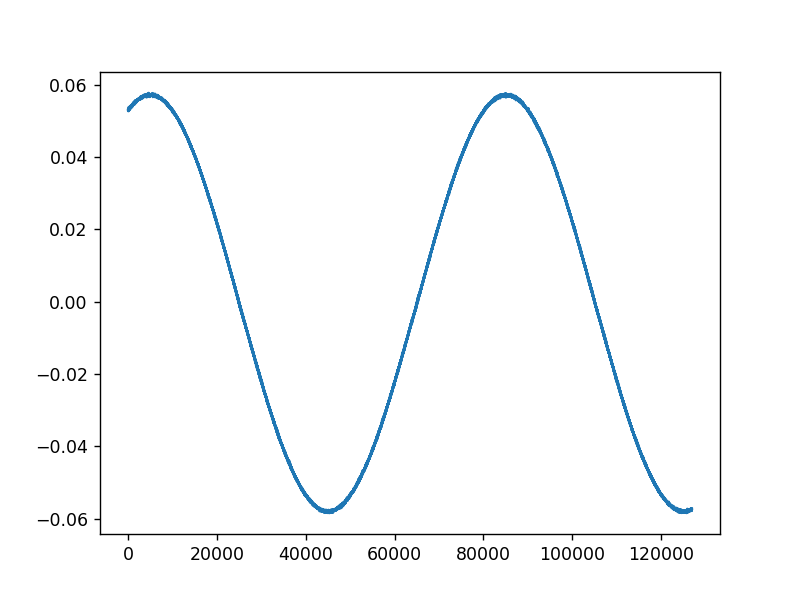

/home/stephane/VirtualEnvs/tensorflow/lib/python3.11/site-packages/matplotlib/backends/backend_nbagg.py:181: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm('matplotlib', data={'id': self.uuid})


In [119]:
figure()
plot(rtb.scaledata(y))

In [120]:
fg = hp33500.hp33500('zaire.lab21')

In [11]:
fg.get_amplitude(1)

'+5.0000000000000E-0 VP'

In [98]:
npoints = 1000000;
# we want near 256kS/s
actime = 0.25/256000 * npoints   # because 4 channels, crazy thing!

command = "TIMebase:ACQTime "+str(actime)
scope.write(command)
command = "ACQ:POINTS " + str(npoints)
scope.write(command)

In [99]:
scope.ask("acq:points?")

'1000000'

In [100]:
scope.ask("TIM:ACQT?")

'9.77E-01'

In [114]:
arat=scope.ask("ACQ:POINTS:ARAT?")
print(arat)
float(arat)
srat = scope.ask("ACQ:SRAT?")
print(float(srat))
acqtime = srat = scope.ask("TIMEBASE:ACQTIME?")
print(float(acqtime))
scope.ask("acq:points?")

9.6154E+06
253000.0
0.516


'5000000'

In [115]:
x,y=scope.get_channels([1,3], nbytes=2)

In [116]:
x['settings'].splitlines()

['HEAD:-2.5800039E-01,2.5800039E-01,130568,1',
 'YRES:16',
 'YOR:-3.224961853E-01',
 'YINC:7.629394531E-06',
 'XOR:-2.580003920E-01',
 'XINC:3.952000000E-06',
 'FORM:UINT,16']

# Try to get some data

In [122]:
x,y,z=scope.get_channels([1,3,4], nbytes=2, fname='s20240110_001')

In [124]:
fg.set_amplitude(1,1.5)

'+1.5000000000000E+0 VP'

In [125]:
import time

These are both lasers highest C

In [143]:
file_index=1
for ampl in arange(0.4,2.2,0.2):
    fg.set_amplitude(1, ampl)
    time.sleep(2)
    fname = f's20240110_{file_index:03d}'
    x,y,z=scope.get_channels([1,3,4], nbytes=2, fname='s20240110_001')
    file_index +=1
    print(fname, ampl)

s20240110_001 0.4
s20240110_002 0.6000000000000001
s20240110_003 0.8000000000000002
s20240110_004 1.0000000000000002
s20240110_005 1.2000000000000002
s20240110_006 1.4000000000000004
s20240110_007 1.6000000000000005
s20240110_008 1.8000000000000003
s20240110_009 2.0000000000000004


For the 20 series I decrease feedback on the 1.5 microns laser, leave it high for the red

In [144]:
file_index=20
for ampl in arange(0.4,2.2,0.2):
    fg.set_amplitude(1, ampl)
    time.sleep(2)
    fname = f's20240110_{file_index:03d}'
    x,y,z=scope.get_channels([1,3,4], nbytes=2, fname='s20240110_001')
    file_index +=1
    print(fname, ampl)

s20240110_020 0.4
s20240110_021 0.6000000000000001
s20240110_022 0.8000000000000002
s20240110_023 1.0000000000000002
s20240110_024 1.2000000000000002
s20240110_025 1.4000000000000004
s20240110_026 1.6000000000000005
s20240110_027 1.8000000000000003
s20240110_028 2.0000000000000004


Seres 30 to 38 I re-increase in  the 1.5 microns laser and diminish in the 0.6 laser

In [145]:
file_index=30
for ampl in arange(0.4,2.2,0.2):
    fg.set_amplitude(1, ampl)
    time.sleep(2)
    fname = f's20240110_{file_index:03d}'
    x,y,z=scope.get_channels([1,3,4], nbytes=2, fname='s20240110_001')
    file_index +=1
    print(fname, ampl)

s20240110_030 0.4
s20240110_031 0.6000000000000001
s20240110_032 0.8000000000000002
s20240110_033 1.0000000000000002
s20240110_034 1.2000000000000002
s20240110_035 1.4000000000000004
s20240110_036 1.6000000000000005
s20240110_037 1.8000000000000003
s20240110_038 2.0000000000000004


Here the fo r40 series, both feedbacks are decreased

In [146]:
file_index=40
for ampl in arange(0.4,2.2,0.2):
    fg.set_amplitude(1, ampl)
    time.sleep(2)
    fname = f's20240110_{file_index:03d}'
    x,y,z=scope.get_channels([1,3,4], nbytes=2, fname='s20240110_001')
    file_index +=1
    print(fname, ampl)

s20240110_040 0.4
s20240110_041 0.6000000000000001
s20240110_042 0.8000000000000002
s20240110_043 1.0000000000000002
s20240110_044 1.2000000000000002
s20240110_045 1.4000000000000004
s20240110_046 1.6000000000000005
s20240110_047 1.8000000000000003
s20240110_048 2.0000000000000004


In [148]:
file_index=50
for ampl in arange(0.4,2.2,0.2):
    fg.set_amplitude(1, ampl)
    time.sleep(2)
    fname = f's20240110_{file_index:03d}'
    x,y,z=scope.get_channels([1,3,4], nbytes=2, fname='s20240110_001')
    file_index +=1
    print(fname, ampl)

s20240110_050 0.4
s20240110_051 0.6000000000000001
s20240110_052 0.8000000000000002
s20240110_053 1.0000000000000002
s20240110_054 1.2000000000000002
s20240110_055 1.4000000000000004
s20240110_056 1.6000000000000005
s20240110_057 1.8000000000000003
s20240110_058 2.0000000000000004


In the 60 sereis we changed the curent of the red laser (53.9mA) and its signal is full of very large fluctuations

In [149]:
file_index=60
for ampl in arange(0.4,2.2,0.2):
    fg.set_amplitude(1, ampl)
    time.sleep(2)
    fname = f's20240110_{file_index:03d}'
    x,y,z=scope.get_channels([1,3,4], nbytes=2, fname='s20240110_001')
    file_index +=1
    print(fname, ampl)

s20240110_060 0.4
s20240110_061 0.6000000000000001
s20240110_062 0.8000000000000002
s20240110_063 1.0000000000000002
s20240110_064 1.2000000000000002
s20240110_065 1.4000000000000004
s20240110_066 1.6000000000000005
s20240110_067 1.8000000000000003
s20240110_068 2.0000000000000004


All the previous series were overwritten, bug by me...

Now for series 100 we go to much larger amplitudes, from 1 to 5V. Both feebdakc levels are high.

In [150]:
file_index=100
for ampl in arange(1,5.5,0.5):
    fg.set_amplitude(1, ampl)
    time.sleep(2)
    fname = f's20240110_{file_index:03d}'
    x,y,z=scope.get_channels([1,3,4], nbytes=2, fname=fname)
    file_index +=1
    print(fname, ampl)

s20240110_100 1.0
s20240110_101 1.5
s20240110_102 2.0
s20240110_103 2.5
s20240110_104 3.0
s20240110_105 3.5
s20240110_106 4.0
s20240110_107 4.5
s20240110_108 5.0


In [151]:
file_index=110
for ampl in arange(1,5.5,0.5):
    fg.set_amplitude(1, ampl)
    time.sleep(2)
    fname = f's20240110_{file_index:03d}'
    x,y,z=scope.get_channels([1,3,4], nbytes=2, fname=fname)
    file_index +=1
    print(fname, ampl)

s20240110_110 1.0
s20240110_111 1.5
s20240110_112 2.0
s20240110_113 2.5
s20240110_114 3.0
s20240110_115 3.5
s20240110_116 4.0
s20240110_117 4.5
s20240110_118 5.0


Series 120 C2 is bad (red laser), 1.5 still good.

In [152]:
file_index=120
for ampl in arange(1,5.5,0.5):
    fg.set_amplitude(1, ampl)
    time.sleep(2)
    fname = f's20240110_{file_index:03d}'
    x,y,z=scope.get_channels([1,3,4], nbytes=2, fname=fname)
    file_index +=1
    print(fname, ampl)

s20240110_120 1.0
s20240110_121 1.5
s20240110_122 2.0
s20240110_123 2.5
s20240110_124 3.0
s20240110_125 3.5
s20240110_126 4.0
s20240110_127 4.5
s20240110_128 5.0


130 series, the red laser is good but the 1.5 laser is bad (low C)

In [153]:
file_index=130
for ampl in arange(1,5.5,0.5):
    fg.set_amplitude(1, ampl)
    time.sleep(2)
    fname = f's20240110_{file_index:03d}'
    x,y,z=scope.get_channels([1,3,4], nbytes=2, fname=fname)
    file_index +=1
    print(fname, ampl)

s20240110_130 1.0
s20240110_131 1.5
s20240110_132 2.0
s20240110_133 2.5
s20240110_134 3.0
s20240110_135 3.5
s20240110_136 4.0
s20240110_137 4.5
s20240110_138 5.0


The 140 series both lasers are bad (low C)

In [154]:
file_index=140
for ampl in arange(1,5.5,0.5):
    fg.set_amplitude(1, ampl)
    time.sleep(2)
    fname = f's20240110_{file_index:03d}'
    x,y,z=scope.get_channels([1,3,4], nbytes=2, fname=fname)
    file_index +=1
    print(fname, ampl)

s20240110_140 1.0
s20240110_141 1.5
s20240110_142 2.0
s20240110_143 2.5
s20240110_144 3.0
s20240110_145 3.5
s20240110_146 4.0
s20240110_147 4.5
s20240110_148 5.0


In [156]:
def run_acq(file_index):
    for ampl in arange(1,5.5,0.5):
        fg.set_amplitude(1, ampl)
        time.sleep(2)
        fname = f's20240110_{file_index:03d}'
        x,y,z=scope.get_channels([1,3,4], nbytes=2, fname=fname)
        file_index +=1
        print(fname, ampl)

The 150 series has one laser completely broken (the red one) by changing current (56.2)

In [158]:

run_acq(150)

s20240110_150 1.0
s20240110_151 1.5
s20240110_152 2.0
s20240110_153 2.5
s20240110_154 3.0
s20240110_155 3.5
s20240110_156 4.0
s20240110_157 4.5
s20240110_158 5.0



# Now a few 'final validation' traces

We put a fast and large amplitude modulation

In [159]:
file_index=160
fname = f's20240110_{file_index:03d}'
x,y,z=scope.get_channels([1,3,4], nbytes=2, fname=fname)

<IPython.core.display.Javascript object>


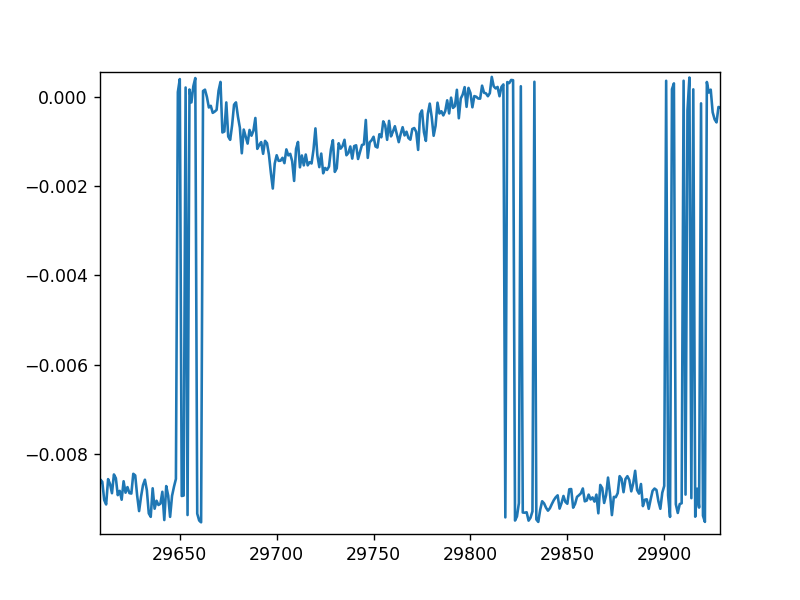

In [164]:
figure()
#plot(rtb.scaledata(x))
plot(rtb.scaledata(z))

In [165]:
file_index=161
fname = f's20240110_{file_index:03d}'
x,y,z=scope.get_channels([1,3,4], nbytes=2, fname=fname)

For 161, the 1.5 laser is good, the 0.6 is degraded

for the 162 the 1.5 laser is degraded, the 0.6 is good

In [168]:
file_index=162
fname = f's20240110_{file_index:03d}'
x,y,z=scope.get_channels([1,3,4], nbytes=2, fname=fname)

For 163 both are degraded

In [169]:
file_index=163
fname = f's20240110_{file_index:03d}'
x,y,z=scope.get_channels([1,3,4], nbytes=2, fname=fname)